## Lecture 7: Principal Component Analysis (PCA)

In [1]:
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.image import imread

plt.rcParams['xtick.labelsize']=20      # change the tick label size for x axis
plt.rcParams['ytick.labelsize']=20      # change the tick label size for x axis
plt.rcParams['axes.linewidth']=1        # change the line width of the axis
plt.rcParams['xtick.major.width'] = 3   # change the tick line width of x axis
plt.rcParams['ytick.major.width'] = 3   # change the tick line width of y axis
rc('text', usetex=False)                # disable LaTeX rendering in plots
rc('font',**{'family':'DejaVu Sans'})   # set the font of the plot to be DejaVu Sans

### 0. Load dog.jpg

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(-0.5, 1499.5, 1999.5, -0.5)

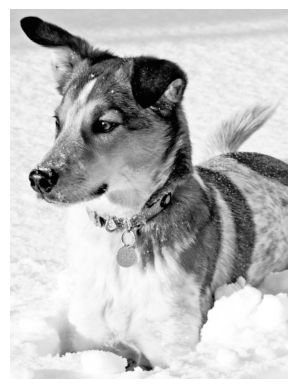

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/ME491"
image_path = os.path.join(path, "image/dog.jpg")

A = imread(image_path)
X = np.mean(A, -1) # Convert RGB to grayscale
plt.imshow(X, cmap="Greys_r")
plt.axis('off') # We don't need axis here so let's remove them

### 1. The `PCA` command

There are many ways to perform PCA in Python. One simple way is just to follow the derivations and compute relevant matrices using the SVD results, but there are also packages with a single `pca` command included.  For example, the `sklearn.decomposition.PCA`.

To read more about it: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

`sklearn.decomposition.PCA` can output you both values related to `SVD` and `PCA`.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
S = pca.singular_values_
V = pca.components_
D = pca.explained_variance_

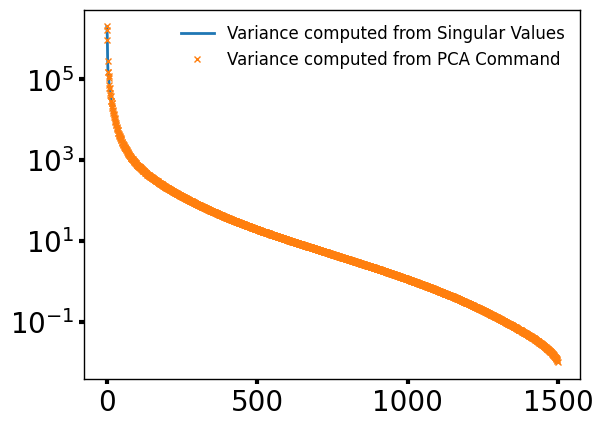

In [6]:
n = len(X)
plt.semilogy(S**2/(n-1), linewidth = 2, label = "Variance computed from Singular Values")
plt.semilogy(D, 'x', markersize = 5, label = "Variance computed from PCA Command")
plt.legend(frameon = False, fontsize = 12)

### 2. Ovarian Cancer Data

Quote from textbook:

This example consists of gene data for 216 patients, 121 of whom have ovarian cancer, and 95 of whom do not. For each patient, there is a vector of data containing the expression of 4000 genes. There are multiple challenges with this type of data, namely the high dimension of the data features. However, we see from Fig. 1.14 that there is significant variance captured in the first few PCA modes. Said another way, the gene data is highly correlated, so that many patients have significant overlap in their gene expression. The ability to visualize patterns and correlations in high-dimensional data is an important reason to use PCA, and PCA has been widely used to find patterns in high-dimensional biological and genetic data

In [ ]:
data_path = os.path.join(path, "data")

obs = np.loadtxt(os.path.join(data_path, "ovariancancer_obs.csv"), delimiter=',')
f = open(os.path.join(data_path, 'ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")

Text(0, 0.5, 'Cumulative Sum')

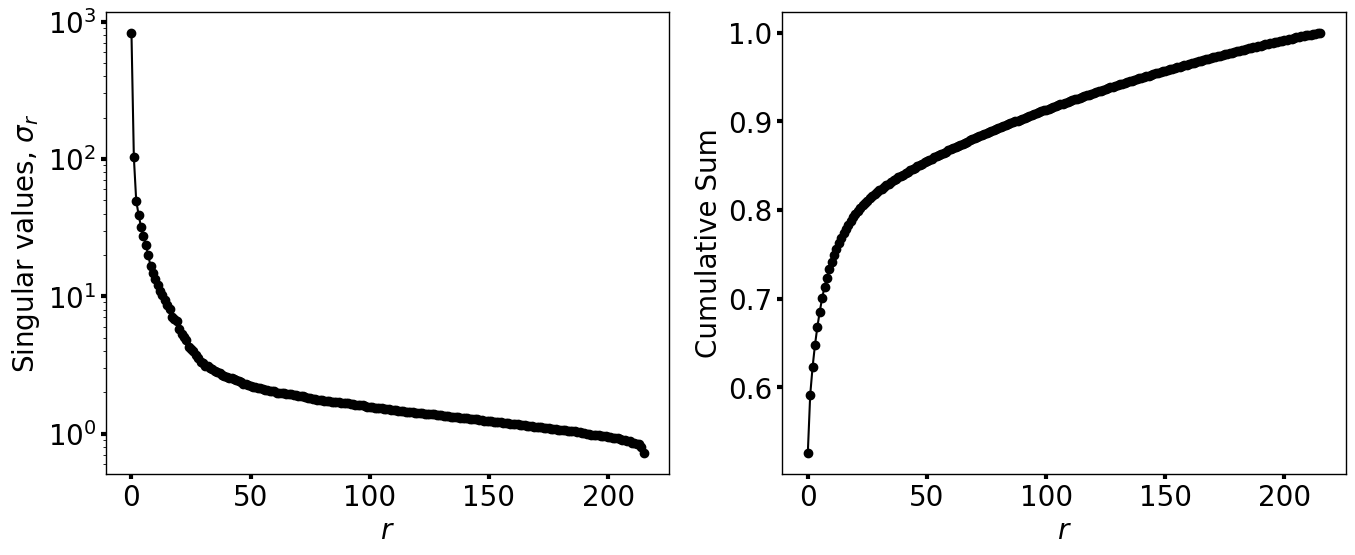

In [17]:
U, S, VT = np.linalg.svd(obs,full_matrices=0)

fig1 = plt.figure(figsize=(16,6))
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax1.set_xlabel(r'$r$',fontsize=20)
ax1.set_ylabel(r'Singular values, $\sigma_r$',fontsize=20)
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')
ax2.set_xlabel(r'$r$',fontsize=20)
ax2.set_ylabel('Cumulative Sum',fontsize=20)

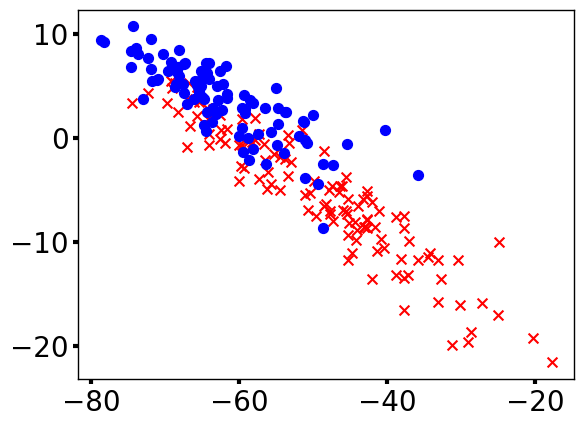

In [42]:
for j in range(obs.shape[0]):
  x = VT[0,:] @ obs[j,:].T
  y = VT[1,:] @ obs[j,:].T
  z = VT[2,:] @ obs[j,:].T
  if grp[j] == 'Cancer':
    plt.scatter(x,y,marker='x',color='r',s=50, label = "Cancer")
  else:
    plt.scatter(x,y,marker='o',color='b',s=50, label = "No Cancer")

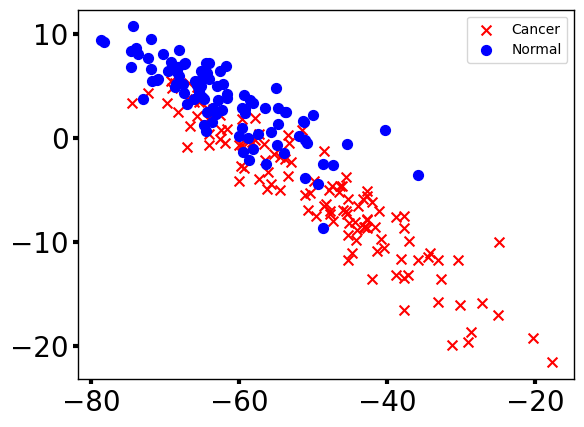

In [43]:
x = VT[0,:] @ obs.T
y = VT[1,:] @ obs.T
idx_1 = [i for i, x in enumerate(grp) if x == "Cancer"]
idx_2 = [i for i, x in enumerate(grp) if x == "Normal"]
plt.scatter(x[idx_1], y[idx_1],marker='x',color='r',s=50, label = "Cancer")
plt.scatter(x[idx_2], y[idx_2],marker='o',color='b',s=50, label = "Normal")
plt.legend()

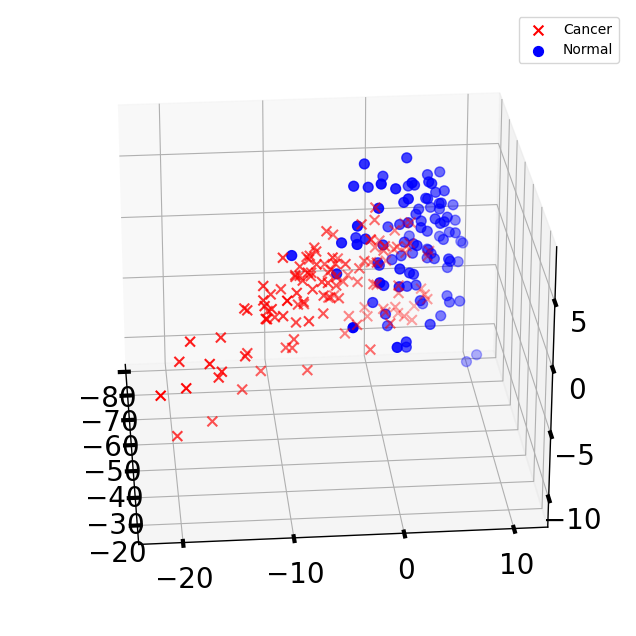

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure(figsize=(12,8))
ax = fig2.add_subplot(111, projection='3d')

x = VT[0,:] @ obs.T
y = VT[1,:] @ obs.T
z = VT[2,:] @ obs.T
idx_1 = [i for i, x in enumerate(grp) if x == "Cancer"]
idx_2 = [i for i, x in enumerate(grp) if x == "Normal"]
ax.scatter(x[idx_1], y[idx_1], z[idx_1], marker='x',color='r',s=50, label = "Cancer")
ax.scatter(x[idx_2], y[idx_2], z[idx_2], marker='o',color='b',s=50, label = "Normal")
plt.legend()

ax.view_init(25,-5)